## 神经网络
```
神经网络组成：
1. 输入层
2. 隐层
3. 激活函数
4. 池化层
5. 全连接层
6. 输出层
```
<img src='神经网络.png' style='zoom:100%;float:left'>

```
1. 输入层：源数据输入

2. 隐层：通过线性权重的乘积获取隐层的特征图

3. 激活函数：权重参数的乘积是线性特征提取，即进行一次线性分类，此时分类会有很多分类错误的数据点，激活函数是通过sigmod 、relu等过滤函数将一些特征不明显或者特征值为负数的特征值过滤掉，即是一次选择过程，该选择过程为非线性选择。

4. 池化层：为了防止过拟合而对隐层特征图进行下采样操作，一般按照kernelsize=(2,2)进行赤化操作

5. 全连接层： 将通过多次提取的语义特征图数据 连接到一起用于分类或者回归操作

6. 输出层：将全连接层的值代入计算损失值
```

## 创建数据

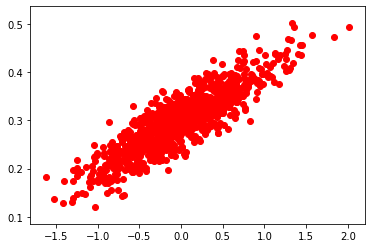

In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
## 随机生成1000个生成点
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]
plt.scatter(x_data,y_data,c='r')

## Tensorflow的线性回归实现

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

### 1.Tensorflow 线性回归模型定义

In [5]:
#生成1维的W矩阵，取值[-1,1]之间的随机数
W = tf.Variable(tf.random_uniform([1],-1,1),name='W')
#生成1维偏置项矩阵b
b = tf.Variable(tf.zeros([1]),name='b')
#线性模型
y = W*x_data + b

### 2.Tensorflow损失函数定义

In [6]:
# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')

### 3.Tensorflow损失函数操作方式定义
```
在tensorflow中梯度操作句柄optimizer是学习model的管理模块，一方面用于激活model的前向传播和反向传播操作，并限制反向传播过程中梯度下降的操作方式以及学习率
```

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

### 4.Tensorflow 确定损失函数求解目标

In [8]:
train = optimizer.minimize(loss, name='train')

### 5.创建训练图并开始训练

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

print("W =", sess.run(W), "b =",sess.run(b) , "lossess.run(b)s =", sess.run(loss))
for step in range(20):
    sess.run(train)
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))

W = [-0.93601084] b = [0.] lossess.run(b)s = 0.3970285
W = [-0.63549685] b = [0.28142208] loss = 0.16072825
W = [-0.41848332] b = [0.28702798] loss = 0.08037014
W = [-0.26545542] b = [0.29107624] loss = 0.040411416
W = [-0.15754543] b = [0.2939309] loss = 0.020541606
W = [-0.08145103] b = [0.29594392] loss = 0.010661179
W = [-0.02779189] b = [0.2973634] loss = 0.0057480545
W = [0.01004668] b = [0.2983644] loss = 0.0033049618
W = [0.03672914] b = [0.29907024] loss = 0.0020901144
W = [0.05554468] b = [0.299568] loss = 0.0014860213
W = [0.06881276] b = [0.29991898] loss = 0.0011856308
W = [0.07816894] b = [0.3001665] loss = 0.0010362592
W = [0.0847666] b = [0.30034104] loss = 0.0009619828
W = [0.08941904] b = [0.3004641] loss = 0.0009250484
W = [0.09269978] b = [0.3005509] loss = 0.0009066825
W = [0.09501325] b = [0.3006121] loss = 0.00089754973
W = [0.09664463] b = [0.30065525] loss = 0.00089300855
W = [0.09779502] b = [0.30068567] loss = 0.00089075026
W = [0.09860623] b = [0.30070713] l

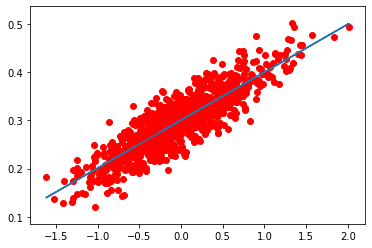

In [13]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()

## Pytorch的线性回归实现

In [56]:
from torch import nn
import torch.nn.functional as F

class MyLinearRegression(nn.Module):
    def __init__(self,in_channel,out_channel):
        super(MyLinearRegression,self).__init__()
        self.out = nn.Linear(in_channel,out_channel)
    
    def forward(self,x):
        x = self.out(x)
        return x

In [57]:
# 数据转换为torch类型
import torch
x_train,y_train = map(torch.tensor,(x_data,y_data))

In [58]:
from torch import optim

def GetModelAndOpt():
    in_channel = 1
    out_channel = 1
    model = MyLinearRegression(in_channel,out_channel)
    opt  = optim.SGD(model.parameters(),lr=0.001)
    loss_func = torch.nn.MSELoss()
    
    return model,opt,loss_func

def loss_batch(model,x_data,y_data,loss_func,opt=None):
    if model:
        loss = loss_func(model(x_data),y_data)
    else:
        print('model is not exit')
        return
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    return loss.item(),len(x_data)
    

In [66]:
train_loss_val = []
def model_fit(steps,model,opt,loss_func,train_dataloader):
    for step in range(steps):
        model.train()
        losses,nums = zip(*[loss_batch(model,x,y,loss_func,opt) for x,y in train_dataloader])
        train_loss = np.sum(np.multiply(losses,nums)/np.sum(nums))
        #print('当前step='+str(step),' 验证集损失值：'+str(train_loss))
        train_loss_val.append(train_loss)
    torch.save(model.state_dict(),'model.pkl') 
    

In [67]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
def DataGet(x_train,y_train,batch):
    
    x_train,y_train = map(torch.tensor,(x_train,y_train))
    train_dataset    = TensorDataset(x_train,y_train)
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    return train_dataloader

In [68]:
batch = 1
train_dataloader= DataGet(x_train,y_train,batch)
model,opt,loss_func = GetModelAndOpt()
steps = 100
model_fit(steps,model,opt,loss_func,train_dataloader)

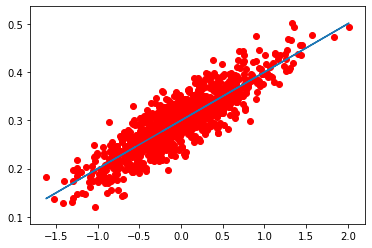

In [69]:
plt.scatter(x_data,y_data,c='r')
y_pred = [model(torch.tensor([x]))  for x in x_data]
y_pred = [x.detach().numpy() for x in y_pred]
y_pred = np.array(y_pred).reshape(len(y_pred)).tolist()
plt.plot(x_data,y_pred)
plt.show()

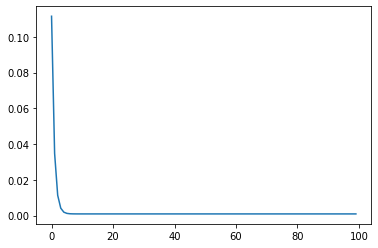

In [71]:
plt.plot(train_loss_val)